# Robust trough detection algorithm (using z-scores)

Refrence for method: https://stackoverflow.com/questions/22583391/peak-signal-detection-in-realtime-timeseries-data/22640362#22640362

In [1]:
import numpy as np
import pylab
import pandas as pd
import matplotlib.pyplot as plt

triads = [['BPS'+str(i),'BPS'+str(i+20),'BPS'+str(i+40)] for i in range(1,21)]

Lag = the lag of the moving window

Threshold = the z-score at which the algorithm signals

Influence = the influence (between 0 and 1) of new signals on the mean and standard deviation. 


For example, a lag of 5 will use the last 5 observations to smooth the data. 


A threshold of 3.5 will signal if a datapoint is 3.5 standard deviations away from the moving mean. 


And an influence of 0.5 gives signals half of the influence that normal datapoints have. Likewise, an influence of 0 ignores signals completely for recalculating the new threshold. An influence of 0 is therefore the most robust option (but assumes stationarity); putting the influence option at 1 is least robust. For non-stationary data, the influence option should therefore be put somewhere between 0 and 1.

In [2]:
def thresholding_algo(y, lag, threshold, influence):
    signals = np.zeros(len(y))
    filteredY = np.array(y)
    avgFilter = [0]*len(y)
    stdFilter = [0]*len(y)
    avgFilter[lag - 1] = np.mean(y[0:lag])
    stdFilter[lag - 1] = np.std(y[0:lag])
    for i in range(lag, len(y)):
        if abs(y[i] - avgFilter[i-1]) > threshold * stdFilter [i-1]:
            if y[i] > avgFilter[i-1]:
                signals[i] = 1
            else:
                signals[i] = -1

            filteredY[i] = influence * y[i] + (1 - influence) * filteredY[i-1]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])
        else:
            signals[i] = 0
            filteredY[i] = y[i]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])

    return dict(signals = np.asarray(signals),
                avgFilter = np.asarray(avgFilter),
                stdFilter = np.asarray(stdFilter))

In [43]:
# Data
df = pd.read_csv('Data/15_Feb_C1_Bad_Case_8am.csv')
y1 = df['BPS1'].to_numpy()
y2 = df['BPS21'].to_numpy()
y3 = df['BPS41'].to_numpy()


# Settings: lag = 30, threshold = 5, influence = 0
lag = 5
threshold = 3
influence = 0.3

# Run algo with settings from above
result1 = thresholding_algo(y1, lag=lag, threshold=threshold, influence=influence)
result2 = thresholding_algo(y2, lag=lag, threshold=threshold, influence=influence)
result3 = thresholding_algo(y3, lag=lag, threshold=threshold, influence=influence)

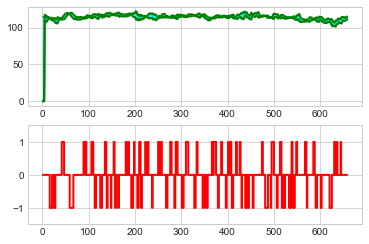

In [44]:
# Plot result
pylab.subplot(211)
pylab.plot(np.arange(1, len(y1)+1), y1)

pylab.plot(np.arange(1, len(y1)+1),
           result1["avgFilter"], color="cyan", lw=2)

pylab.plot(np.arange(1, len(y1)+1),
           result1["avgFilter"] + threshold * result1["stdFilter"], color="green", lw=2)

pylab.plot(np.arange(1, len(y1)+1),
           result1["avgFilter"] - threshold * result1["stdFilter"], color="green", lw=2)

pylab.subplot(212)
pylab.step(np.arange(1, len(y1)+1), result1["signals"], color="red", lw=2)
pylab.ylim(-1.5, 1.5)
pylab.show()

In [45]:
locations1=[]
for i in range(len(result1['signals'])):
    if result1['signals'][i] == -1.0:
        locations1.append(i)

locations2=[]
for i in range(len(result2['signals'])):
    if result2['signals'][i] == -1.0:
        locations2.append(i)
        
locations3=[]
for i in range(len(result3['signals'])):
    if result3['signals'][i] == -1.0:
        locations3.append(i)

        s1 = set(locations1)
s2 = set(locations2)
s3 = set(locations3)
set1 = s1.intersection(s2)
result_set = set1.intersection(s3)
result_set= list(result_set)
result_set.sort()


In [46]:
result_set

[16, 25, 26, 158, 285, 396, 409, 438, 439, 542, 543]

In [47]:
triads = [['BPS'+str(i),'BPS'+str(i+20),'BPS'+str(i+40)] for i in range(1,21)]

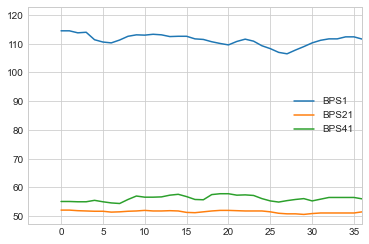

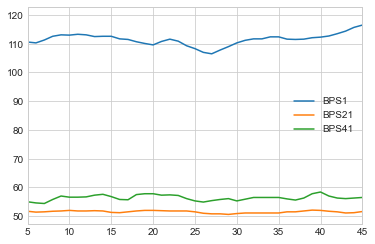

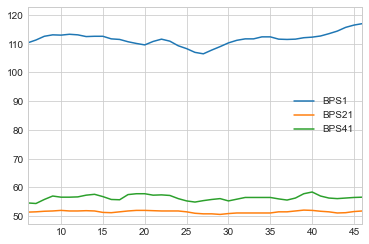

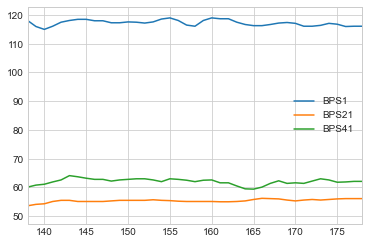

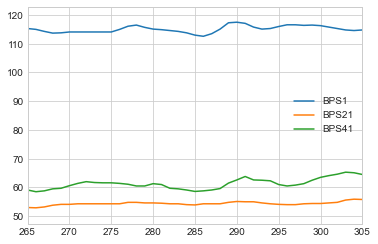

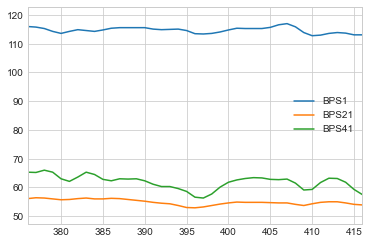

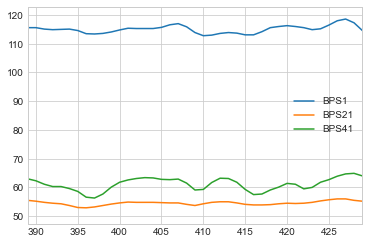

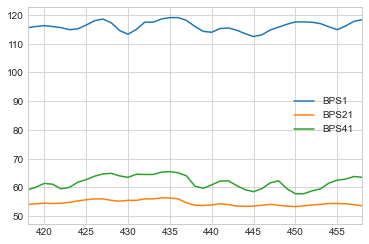

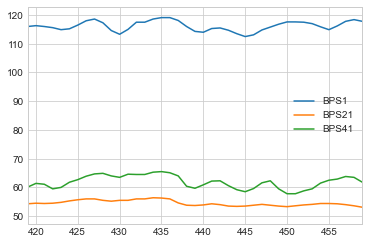

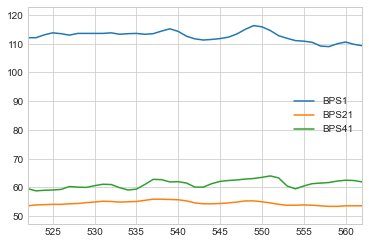

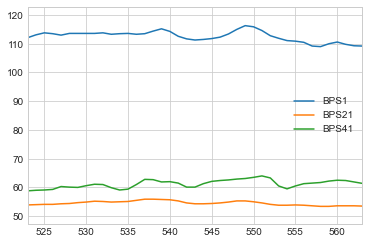

In [48]:
for i in result_set:
    df[triads[0]].plot(xlim=[i-20,i+20])

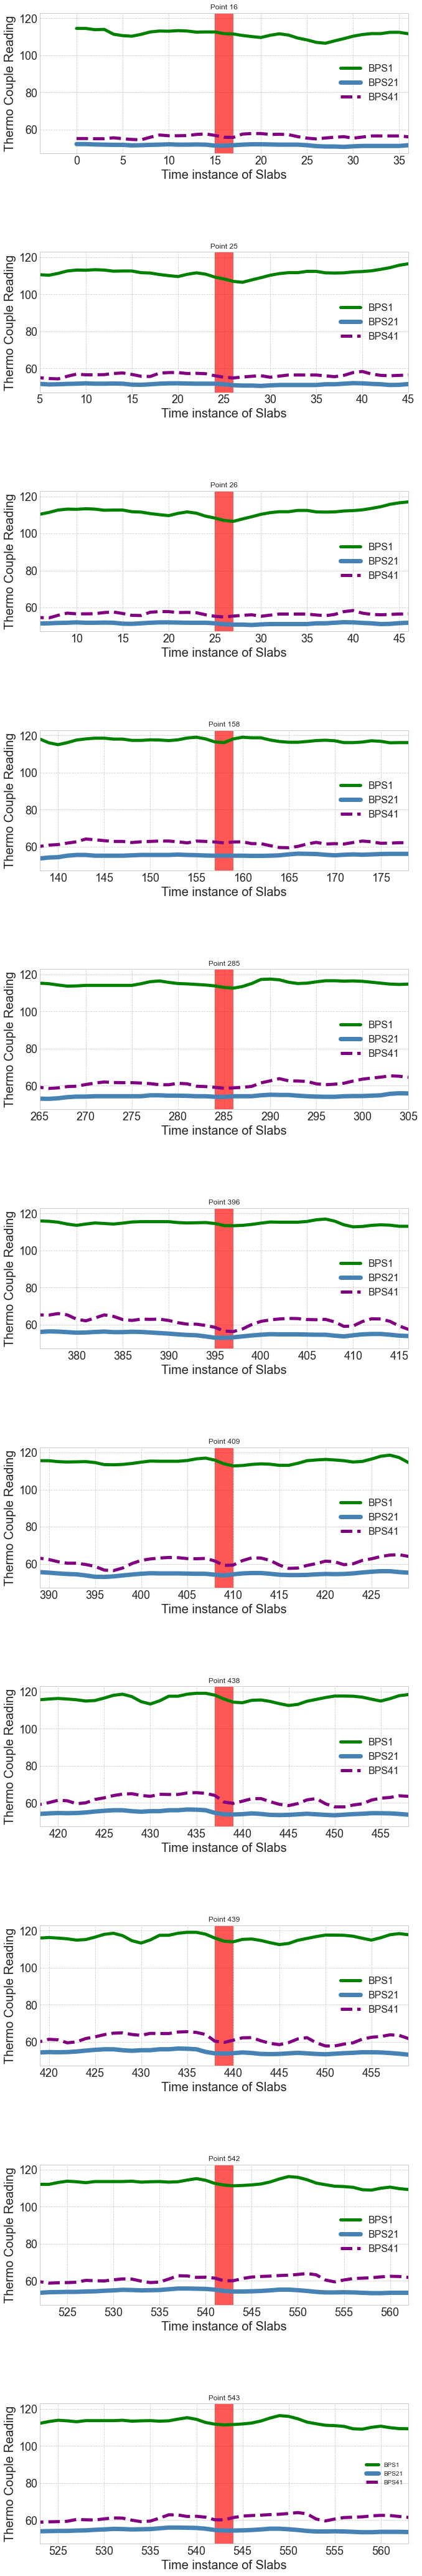

In [55]:
plt.style.use('seaborn-whitegrid')
det= result_set
tr=triads[0]
fig, axs = plt.subplots(len(det), figsize=(12, 60))
colors= ['green', 'steelblue', 'purple']
l_width=[5,7,5]
l_style=['solid', 'solid', 'dashed']

for i in range(len(det)):
    label_= 'Point ' + str(det[i])
    for j in range(3):
        axs[i].plot(df[tr[j]],label=tr[j], linewidth=l_width[j], color=colors[j], linestyle=l_style[j])
        axs[i].axvspan(det[i]-1,det[i]+1, facecolor='r', alpha=0.3)
        axs[i].set_title(label_)
        axs[i].set_ylabel('Thermo Couple Reading', fontsize=20)
        axs[i].set_xlabel('Time instance of Slabs', fontsize=20)
        axs[i].tick_params(axis='both', labelsize=18)
        axs[i].patch.set_linewidth('1')
        axs[i].legend(fontsize=16, loc='center right')
        axs[i].grid(axis = 'both', linestyle='--')
        axs[i].set_xlim(det[i]-20,det[i]+20)
plt.tight_layout(pad=10)
plt.legend()
plt.show()

In [39]:
'''
 lag = the lag of the moving window. For example, a lag of 5 will use the last 5 observations to smooth the data. 
 threshold = the z-score at which the algorithm signals.  A threshold of 3.5 will signal if a datapoint is 3.5 standard deviations away from the moving mean. 



'''



#8, 2.5, 0.5


In [ ]:
lag = 8
threshold = 2.5
influence = 0.5

In [40]:
# Data
df = pd.read_csv('Data/15_Feb_C1_Bad_Case_8am.csv')
c_result= []
funnel = []
for curr in triads[4:8]:
    
    y1 = df[curr[0]].to_numpy()
    y2 = df[curr[1]].to_numpy()
    y3 = df[curr[2]].to_numpy()
    
    num=len(y1)

    
    # Run algo with settings from above
    result1 = thresholding_algo(y1, lag=lag, threshold=threshold, influence=influence)
    result2 = thresholding_algo(y2, lag=lag, threshold=threshold, influence=influence)
    result3 = thresholding_algo(y3, lag=lag, threshold=threshold, influence=influence)

    locations1=[]
    for i in range(len(result1['signals'])):
        if result1['signals'][i] == -1.0:
            locations1.append(i)

    locations2=[]
    for i in range(len(result2['signals'])):
        if result2['signals'][i] == -1.0:
            locations2.append(i)

    locations3=[]
    for i in range(len(result3['signals'])):
        if result3['signals'][i] == -1.0:
            locations3.append(i)

    s1 = set(locations1)
    s2 = set(locations2)
    s3 = set(locations3)
    set1 = s1.intersection(s2)
    result_set = set1.intersection(s3)
    result_set= list(result_set)
    result_set.sort()
    funnel.append(len(result_set))
    c_result.append(result_set)
    print(curr[0] + ' + ' + curr[1] + ' + ' + curr[2] + ' = ' + str(result_set)+ '\n\n')

BPS5 + BPS25 + BPS45 = [8]


BPS6 + BPS26 + BPS46 = [111, 112, 113, 406, 494]


BPS7 + BPS27 + BPS47 = [122, 309]


BPS8 + BPS28 + BPS48 = [134, 268, 424, 425, 462, 515, 516]




In [41]:
print("Funnel Triads readings: BPS5-BPS8\n\n")
per_index=[]
for i in funnel:
    per_index.append(round(i/num,2))
print(str(funnel)+ ' triple sinks for ' + str(num) + ' observations in funnel\n')
print(str(per_index)+ ' triple sinks for per each observation')



Funnel Triads readings: BPS5-BPS8


[1, 5, 2, 7] triple sinks for 658 observations in funnel

[0.0, 0.01, 0.0, 0.01] triple sinks for per each observation


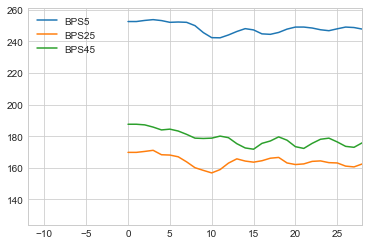

In [42]:
for i in c_result[0]:
    df[triads[4]].plot(xlim=[i-20,i+20])

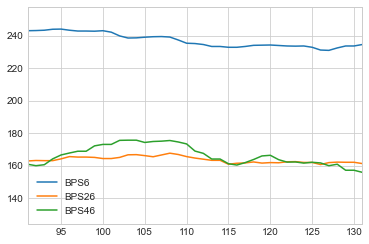

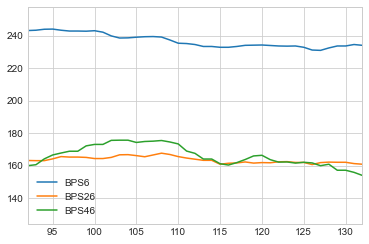

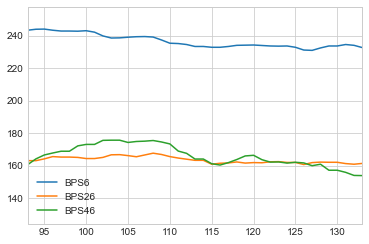

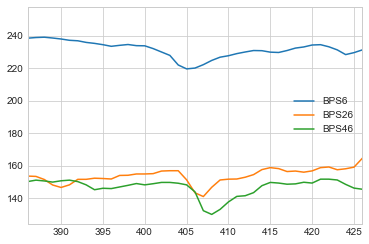

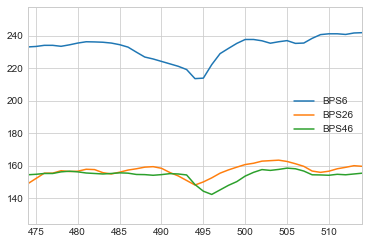

In [35]:
for i in c_result[1]:
    df[triads[5]].plot(xlim=[i-20,i+20])

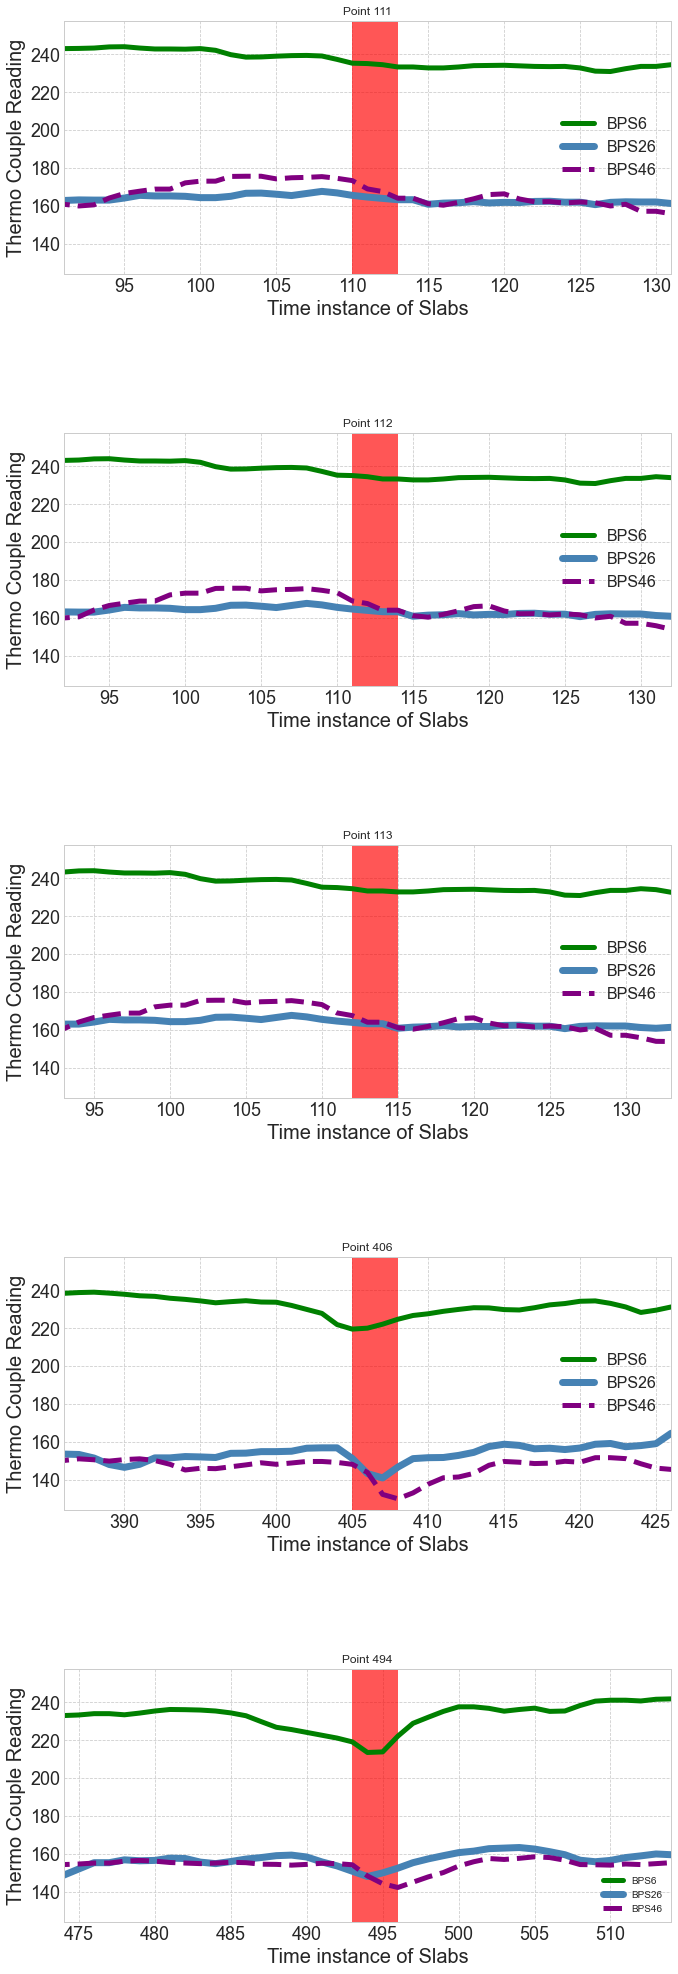

In [60]:
plt.style.use('seaborn-whitegrid')
det= c_result[1]
tr=triads[5]
fig, axs = plt.subplots(len(det), figsize=(12, 30))
colors= ['green', 'steelblue', 'purple']
l_width=[5,7,5]
l_style=['solid', 'solid', 'dashed']

for i in range(len(det)):
    label_= 'Point ' + str(det[i])
    for j in range(3):
        axs[i].plot(df[tr[j]],label=tr[j], linewidth=l_width[j], color=colors[j], linestyle=l_style[j])
        axs[i].axvspan(det[i]-1,det[i]+2, facecolor='r', alpha=0.3)
        axs[i].set_title(label_)
        axs[i].set_ylabel('Thermo Couple Reading', fontsize=20)
        axs[i].set_xlabel('Time instance of Slabs', fontsize=20)
        axs[i].tick_params(axis='both', labelsize=18)
        axs[i].patch.set_linewidth('1')
        axs[i].legend(fontsize=16, loc='center right')
        axs[i].grid(axis = 'both', linestyle='--')
        axs[i].set_xlim(det[i]-20,det[i]+20)
plt.tight_layout(pad=10)
plt.legend()
plt.show()

# Good Data

In [36]:
df = pd.read_csv('Data/15_Good_Case_C2.csv')
c_result= []
funnel = []
for curr in triads[4:8]:
    
    y1 = df[curr[0]].to_numpy()
    y2 = df[curr[1]].to_numpy()
    y3 = df[curr[2]].to_numpy()
    
    num=len(y1)



    # Run algo with settings from above
    result1 = thresholding_algo(y1, lag=lag, threshold=threshold, influence=influence)
    result2 = thresholding_algo(y2, lag=lag, threshold=threshold, influence=influence)
    result3 = thresholding_algo(y3, lag=lag, threshold=threshold, influence=influence)

    locations1=[]
    for i in range(len(result1['signals'])):
        if result1['signals'][i] == -1.0:
            locations1.append(i)

    locations2=[]
    for i in range(len(result2['signals'])):
        if result2['signals'][i] == -1.0:
            locations2.append(i)

    locations3=[]
    for i in range(len(result3['signals'])):
        if result3['signals'][i] == -1.0:
            locations3.append(i)

            s1 = set(locations1)
    s2 = set(locations2)
    s3 = set(locations3)
    set1 = s1.intersection(s2)
    result_set = set1.intersection(s3)
    result_set= list(result_set)
    result_set.sort()
    funnel.append(len(result_set))
    c_result.append(result_set)
    print(curr[0] + ' + ' + curr[1] + ' + ' + curr[2] + ' = ' + str(result_set)+ '\n\n')

BPS5 + BPS25 + BPS45 = [362, 423, 488, 1089, 1090, 1091, 1343]


BPS6 + BPS26 + BPS46 = [486, 651, 653, 654, 1348]


BPS7 + BPS27 + BPS47 = [194, 195, 286, 541, 1097]


BPS8 + BPS28 + BPS48 = [20, 21, 114, 411, 933, 963, 980, 1010, 1011, 1082, 1083, 1172, 1232, 1283, 1284]




In [37]:
print("Funnel Triads readings: BPS5-BPS8\n\n")
per_index=[]
for i in funnel:
    per_index.append(round(i/num,2))
print(str(funnel)+ ' triple sinks for ' + str(num) + ' observations in funnel\n')
print(str(per_index)+ ' triple sinks for per each observation')

Funnel Triads readings: BPS5-BPS8


[7, 5, 5, 15] triple sinks for 1405 observations in funnel

[0.0, 0.0, 0.0, 0.01] triple sinks for per each observation


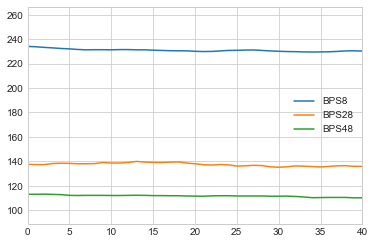

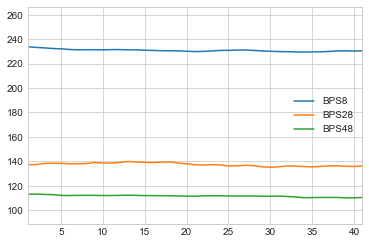

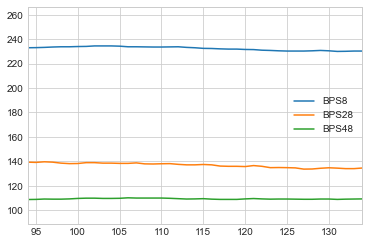

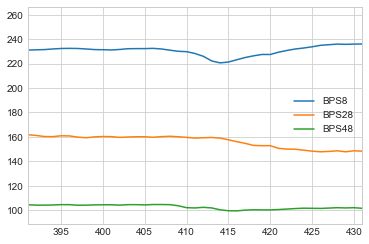

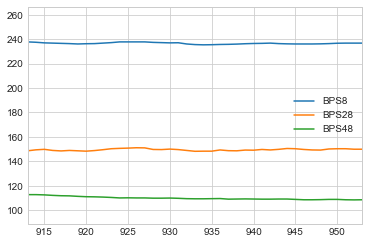

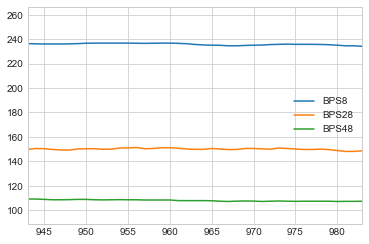

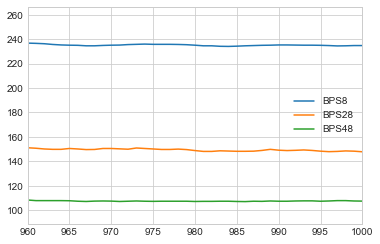

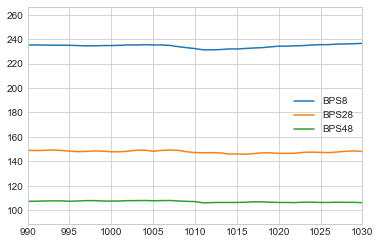

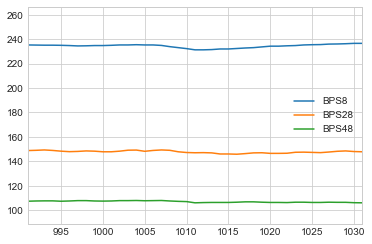

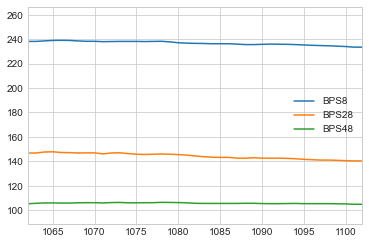

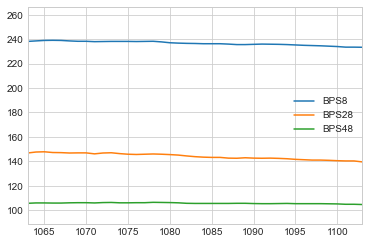

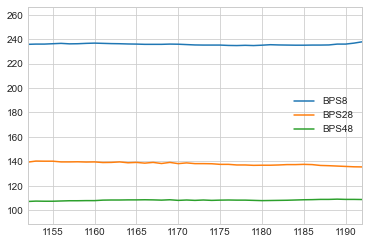

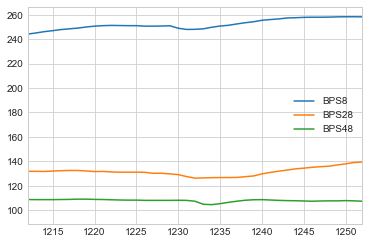

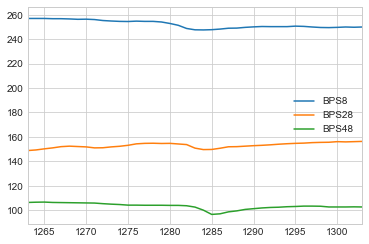

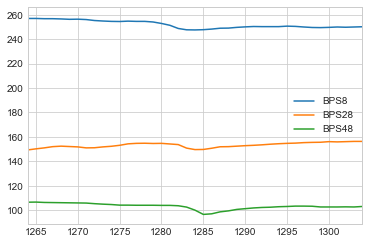

In [38]:
#0-4, 1-5, 2-6, 3-7, 4-8
for i in c_result[3]:
    df[triads[7]].plot(xlim=[i-20,i+20])

In [ ]:
##possible probem...

#approach is promisiing but lots of false positives which creates problem. instead of deacreasing only find tips of possible troughs

# NEWAPPROACH

In [4]:
import numpy as np
import matplotlib.pyplot as plt
triads = [['BPS'+str(i),'BPS'+str(i+20),'BPS'+str(i+40)] for i in range(1,21)]

In [5]:
# Data
x=5
df = pd.read_csv('Data/15_Feb_C1_Bad_Case_8am.csv')
input1 = df[triads[x][0]].to_numpy()
input2 = df[triads[x][1]].to_numpy()
input3 = df[triads[x][2]].to_numpy()

In [6]:
t1= (3/100)*np.mean(input1)
t2= (3/100)*np.mean(input2)
t3= (3/100)*np.mean(input3)

Note to self: Possible Dilemna. In real time, you'll not be able to calculate mean of entire signal beforehand

In [7]:
# signal = (input < np.roll(input,1)) & (input < np.roll(input,-1))
signal1 =  (np.roll(input1,4) - input1 > t1) & (np.roll(input1,-4) - input1 > t1)
signal2 = (np.roll(input2,4) - input2 > t2) & (np.roll(input2,-4) - input2 > t2)
signal3 = (np.roll(input3,4) - input3 > t3) & (np.roll(input3,-4) - input3 > t3)

TypeError: 'method' object is not subscriptable

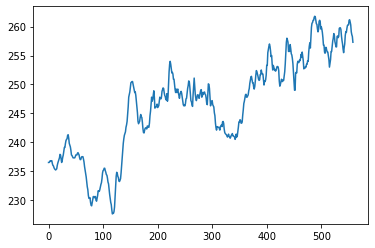

In [29]:
plt.plot(input1)
plt.plot(signal1.nonzero()[0],input[signal1], 'ro')
plt.show()

TypeError: 'method' object is not subscriptable

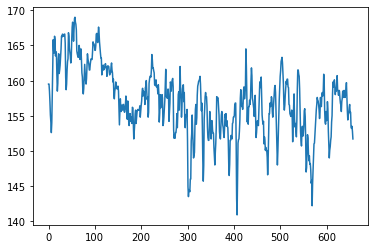

In [11]:
plt.plot(input2)
plt.plot(signal2.nonzero()[0], input[signal2], 'ro')
plt.show()

TypeError: 'method' object is not subscriptable

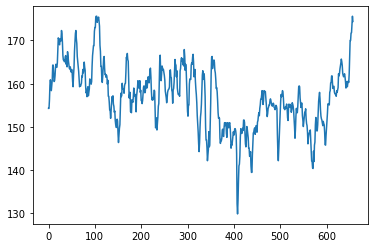

In [12]:
plt.plot(input3)
plt.plot(signal3.nonzero()[0], input[signal3], 'ro')
plt.show()

In [13]:
sig_1=[]
sig_2=[]
sig_3=[]

for i in range(len(signal1)):
    if signal1[i] == True:
        sig_1.append(i)
        
for i in range(len(signal2)):
    if signal2[i] == True:
        sig_2.append(i)

for i in range(len(signal3)):
    if signal3[i] == True:
        sig_3.append(i)
        
print(sig_1, sig_2, sig_3)

[405, 406, 494, 495, 518, 532, 533, 534, 542, 543, 544, 567] [5, 6, 39, 215, 304, 314, 333, 334, 335, 390, 406, 407, 408, 494, 495, 534, 556, 569] [0, 1, 115, 116, 234, 268, 281, 300, 301, 302, 324, 325, 407, 408, 409, 410, 495, 496, 497, 532, 570, 597, 598]


In [14]:
common=[]
for i in sig_1:
    if ((i+1) in sig_2 or i in sig_2 or (i-1) in sig_2) and ((i+1) in sig_3 or i in sig_3 or (i-1) in sig_3):
        common.append(i)

for i in common:
    if (i+1) in common:
        common.remove(i)
        
common

[406, 495, 533]

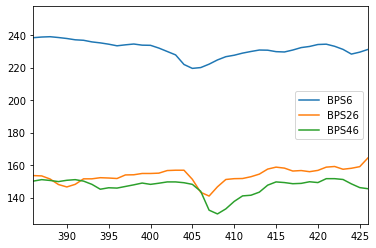

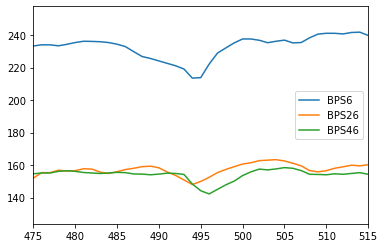

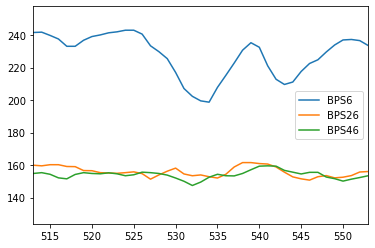

In [16]:
for i in common:
    df[triads[x]].plot(xlim=[i-20,i+20])

In [17]:
df = pd.read_csv('Data/15_Feb_C1_Bad_Case_8am.csv')
c_result=[]
funnel = []
for curr in triads[4:8]:
    
    input1 = df[curr[0]].to_numpy()
    input2 = df[curr[1]].to_numpy()
    input3 = df[curr[2]].to_numpy()
    
    num=len(input1)
    
    sens=3
    band=4
    
    t1= (sens/100)*np.mean(input1)
    t2= (sens/100)*np.mean(input2)
    t3= (sens/100)*np.mean(input3)
    
    signal1 =  (np.roll(input1,band) - input1 > t1) & (np.roll(input1,-band) - input1 > t1)
    signal2 = (np.roll(input2,band) - input2 > t2) & (np.roll(input2,-band) - input2 > t2)
    signal3 = (np.roll(input3,band) - input3 > t3) & (np.roll(input3,-band) - input3 > t3)
    
    sig_1=[]
    sig_2=[]
    sig_3=[]

    for i in range(len(signal1)):
        if signal1[i] == True:
            sig_1.append(i)
        
    for i in range(len(signal2)):
        if signal2[i] == True:
            sig_2.append(i)

    for i in range(len(signal3)):
        if signal3[i] == True:
            sig_3.append(i)
            
    common=[]
    
    for i in sig_1:
        if ((i+1) in sig_2 or i in sig_2 or (i-1) in sig_2) and ((i+1) in sig_3 or i in sig_3 or (i-1) in sig_3):
            common.append(i)

    for i in common:
        if (i+1) in common:
            common.remove(i)
            
    c_result.append(common)
    funnel.append(len(common))
    
    print(curr[0] + ' + ' + curr[1] + ' + ' + curr[2] + ' = ' + str(common)+ '\n\n')

BPS5 + BPS25 + BPS45 = []


BPS6 + BPS26 + BPS46 = [406, 495, 533]


BPS7 + BPS27 + BPS47 = []


BPS8 + BPS28 + BPS48 = []




In [18]:
print("Funnel Triads readings: BPS5-BPS8\n\n")
per_index=[]
for i in funnel:
    per_index.append(round(i/num,2))
print(str(funnel)+ ' triple sinks for ' + str(num) + ' observations in funnel\n')
print(str(per_index)+ ' triple sinks for per each observation')

Funnel Triads readings: BPS5-BPS8


[0, 3, 0, 0] triple sinks for 658 observations in funnel

[0.0, 0.0, 0.0, 0.0] triple sinks for per each observation


# Good Data

In [19]:
df = pd.read_csv('Data/15_Good_Case_C2.csv')

c_result=[]
funnel = []
for curr in triads[4:8]:
    
    input1 = df[curr[0]].to_numpy()
    input2 = df[curr[1]].to_numpy()
    input3 = df[curr[2]].to_numpy()
    
    num=len(input1)
    
    sens=3
    band=4
    
    t1= (sens/100)*np.mean(input1)
    t2= (sens/100)*np.mean(input2)
    t3= (sens/100)*np.mean(input3)
    
    signal1 =  (np.roll(input1,band) - input1 > t1) & (np.roll(input1,-band) - input1 > t1)
    signal2 = (np.roll(input2,band) - input2 > t2) & (np.roll(input2,-band) - input2 > t2)
    signal3 = (np.roll(input3,band) - input3 > t3) & (np.roll(input3,-band) - input3 > t3)
    
    sig_1=[]
    sig_2=[]
    sig_3=[]

    for i in range(len(signal1)):
        if signal1[i] == True:
            sig_1.append(i)
        
    for i in range(len(signal2)):
        if signal2[i] == True:
            sig_2.append(i)

    for i in range(len(signal3)):
        if signal3[i] == True:
            sig_3.append(i)
            
    common=[]
    
    for i in sig_1:
        if ((i+1) in sig_2 or i in sig_2 or (i-1) in sig_2) and ((i+1) in sig_3 or i in sig_3 or (i-1) in sig_3):
            common.append(i)

    for i in common:
        if (i+1) in common:
            common.remove(i)
            
    c_result.append(common)
    funnel.append(len(common))
    
    print(curr[0] + ' + ' + curr[1] + ' + ' + curr[2] + ' = ' + str(common)+ '\n\n')

BPS5 + BPS25 + BPS45 = []


BPS6 + BPS26 + BPS46 = []


BPS7 + BPS27 + BPS47 = []


BPS8 + BPS28 + BPS48 = []




In [20]:
print("Funnel Triads readings: BPS5-BPS8\n\n")
per_index=[]
for i in funnel:
    per_index.append(round(i/num,2))
print(str(funnel)+ ' triple sinks for ' + str(num) + ' observations in funnel\n')
print(str(per_index)+ ' triple sinks for per each observation')

Funnel Triads readings: BPS5-BPS8


[0, 0, 0, 0] triple sinks for 1405 observations in funnel

[0.0, 0.0, 0.0, 0.0] triple sinks for per each observation


# Second Bad Case C2

In [21]:
df = pd.read_csv('Data/LFC C2 15 Feb Bad Case.csv')

c_result=[]
funnel = []
for curr in triads[4:8]:
    
    input1 = df[curr[0]].to_numpy()
    input2 = df[curr[1]].to_numpy()
    input3 = df[curr[2]].to_numpy()
    
    num=len(input1)
    
    sens=3
    band=4
    
    t1= (sens/100)*np.mean(input1)
    t2= (sens/100)*np.mean(input2)
    t3= (sens/100)*np.mean(input3)
    
    signal1 =  (np.roll(input1,band) - input1 > t1) & (np.roll(input1,-band) - input1 > t1)
    signal2 = (np.roll(input2,band) - input2 > t2) & (np.roll(input2,-band) - input2 > t2)
    signal3 = (np.roll(input3,band) - input3 > t3) & (np.roll(input3,-band) - input3 > t3)
    
    sig_1=[]
    sig_2=[]
    sig_3=[]

    for i in range(len(signal1)):
        if signal1[i] == True:
            sig_1.append(i)
        
    for i in range(len(signal2)):
        if signal2[i] == True:
            sig_2.append(i)

    for i in range(len(signal3)):
        if signal3[i] == True:
            sig_3.append(i)
            
    common=[]
    
    for i in sig_1:
        if ((i+1) in sig_2 or i in sig_2 or (i-1) in sig_2) and ((i+1) in sig_3 or i in sig_3 or (i-1) in sig_3):
            common.append(i)

    for i in common:
        if (i+1) in common:
            common.remove(i)
            
    c_result.append(common)
    funnel.append(len(common))
    
    print(curr[0] + ' + ' + curr[1] + ' + ' + curr[2] + ' = ' + str(common)+ '\n\n')

BPS5 + BPS25 + BPS45 = []


BPS6 + BPS26 + BPS46 = [795]


BPS7 + BPS27 + BPS47 = []


BPS8 + BPS28 + BPS48 = []




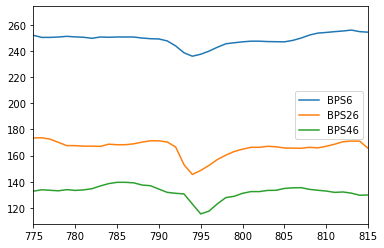

In [22]:
for i in c_result[1]:
    df[triads[5]].plot(xlim=[i-20,i+20])

# Large Good Case

In [23]:
df = pd.read_csv('Data/14_feb_Good_Case_C11.csv')


c_result=[]
funnel = []
for curr in triads[4:8]:
    
    input1 = df[curr[0]].to_numpy()
    input2 = df[curr[1]].to_numpy()
    input3 = df[curr[2]].to_numpy()
    
    num=len(input1)
    
    sens=3
    band=4
    
    t1= (sens/100)*np.mean(input1)
    t2= (sens/100)*np.mean(input2)
    t3= (sens/100)*np.mean(input3)
    
    signal1 =  (np.roll(input1,band) - input1 > t1) & (np.roll(input1,-band) - input1 > t1)
    signal2 = (np.roll(input2,band) - input2 > t2) & (np.roll(input2,-band) - input2 > t2)
    signal3 = (np.roll(input3,band) - input3 > t3) & (np.roll(input3,-band) - input3 > t3)
    
    sig_1=[]
    sig_2=[]
    sig_3=[]

    for i in range(len(signal1)):
        if signal1[i] == True:
            sig_1.append(i)
        
    for i in range(len(signal2)):
        if signal2[i] == True:
            sig_2.append(i)

    for i in range(len(signal3)):
        if signal3[i] == True:
            sig_3.append(i)
            
    common=[]
    
    for i in sig_1:
        if ((i+1) in sig_2 or i in sig_2 or (i-1) in sig_2) and ((i+1) in sig_3 or i in sig_3 or (i-1) in sig_3):
            common.append(i)

    for i in common:
        if (i+1) in common:
            common.remove(i)
            
    c_result.append(common)
    funnel.append(len(common))
    
    print(curr[0] + ' + ' + curr[1] + ' + ' + curr[2] + ' = ' + str(common)+ '\n\n')

BPS5 + BPS25 + BPS45 = [74195, 75111]


BPS6 + BPS26 + BPS46 = [77761, 77850, 77888]


BPS7 + BPS27 + BPS47 = []


BPS8 + BPS28 + BPS48 = [72741, 75623]




In [24]:
print("Funnel Triads readings: BPS5-BPS8\n\n")
per_index=[]
for i in funnel:
    per_index.append(round(i/num,2))
print(str(funnel)+ ' triple sinks for ' + str(num) + ' observations in funnel\n')
print(str(per_index)+ ' triple sinks for per each observation')

Funnel Triads readings: BPS5-BPS8


[2, 3, 0, 2] triple sinks for 82832 observations in funnel

[0.0, 0.0, 0.0, 0.0] triple sinks for per each observation


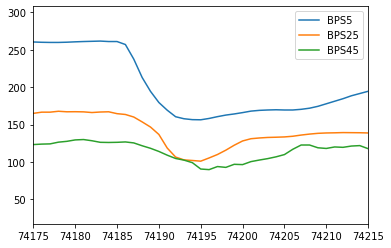

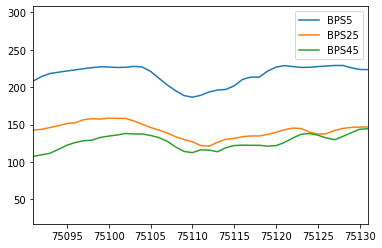

In [25]:
for i in c_result[0]:
    df[triads[4]].plot(xlim=[i-20,i+20])

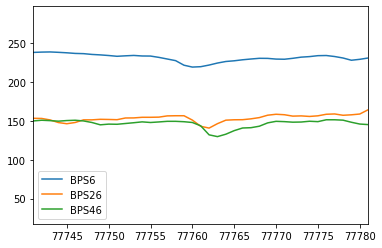

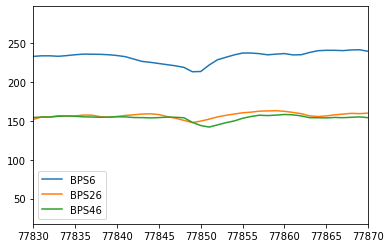

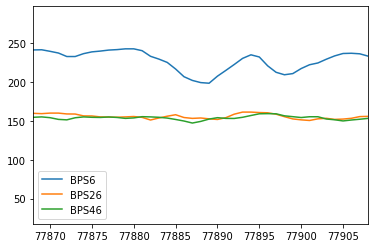

In [27]:
for i in c_result[1]:
    df[triads[5]].plot(xlim=[i-20,i+20])

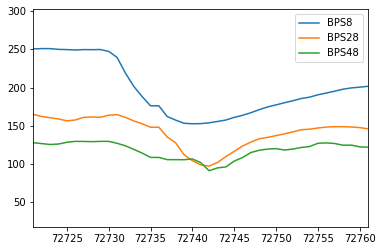

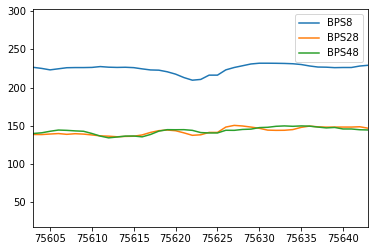

In [302]:
for i in c_result[3]:
    df[triads[7]].plot(xlim=[i-20,i+20])

# On New given Data

In [28]:
df = pd.read_csv('LFC Bad data/LFC_Bad_1.csv')


c_result=[]
funnel = []
for curr in triads[0:20]:
    
    input1 = df[curr[0]].to_numpy()
    input2 = df[curr[1]].to_numpy()
    input3 = df[curr[2]].to_numpy()
    
    num=len(input1)
    
    sens=1.4
    band=6
    
    t1= (sens/100)*np.mean(input1)
    t2= (sens/100)*np.mean(input2)
    t3= (sens/100)*np.mean(input3)
    
    signal1 =  (np.roll(input1,band) - input1 > t1) & (np.roll(input1,-band) - input1 > t1)
    signal2 = (np.roll(input2,band) - input2 > t2) & (np.roll(input2,-band) - input2 > t2)
    signal3 = (np.roll(input3,band) - input3 > t3) & (np.roll(input3,-band) - input3 > t3)
    
    sig_1=[]
    sig_2=[]
    sig_3=[]

    for i in range(len(signal1)):
        if signal1[i] == True:
            sig_1.append(i)
        
    for i in range(len(signal2)):
        if signal2[i] == True:
            sig_2.append(i)

    for i in range(len(signal3)):
        if signal3[i] == True:
            sig_3.append(i)
            
    common=[]
    
    for i in sig_1:
        if ((i+1) in sig_2 or i in sig_2 or (i-1) in sig_2) and ((i+1) in sig_3 or i in sig_3 or (i-1) in sig_3):
            common.append(i)

    for i in common:
        if (i+1) in common:
            common.remove(i)
            
    c_result.append(common)
    funnel.append(len(common))
    
    print(curr[0] + ' + ' + curr[1] + ' + ' + curr[2] + ' = ' + str(common)+ '\n\n')

BPS1 + BPS21 + BPS41 = []


BPS2 + BPS22 + BPS42 = []


BPS3 + BPS23 + BPS43 = [139]


BPS4 + BPS24 + BPS44 = [400, 529]


BPS5 + BPS25 + BPS45 = []


BPS6 + BPS26 + BPS46 = []


BPS7 + BPS27 + BPS47 = []


BPS8 + BPS28 + BPS48 = []


BPS9 + BPS29 + BPS49 = [480]


BPS10 + BPS30 + BPS50 = []


BPS11 + BPS31 + BPS51 = [315, 405, 407]


BPS12 + BPS32 + BPS52 = []


BPS13 + BPS33 + BPS53 = []


BPS14 + BPS34 + BPS54 = [541]


BPS15 + BPS35 + BPS55 = []


BPS16 + BPS36 + BPS56 = []


BPS17 + BPS37 + BPS57 = []


BPS18 + BPS38 + BPS58 = []


BPS19 + BPS39 + BPS59 = [2, 388, 389, 416, 478, 479, 541]


BPS20 + BPS40 + BPS60 = []




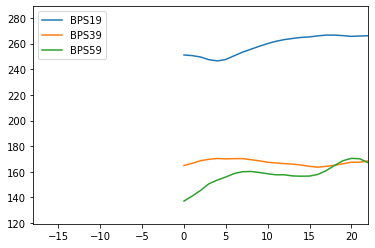

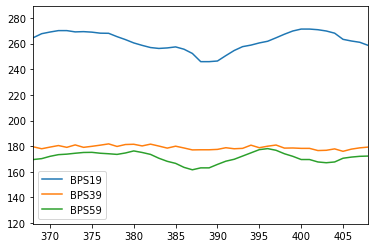

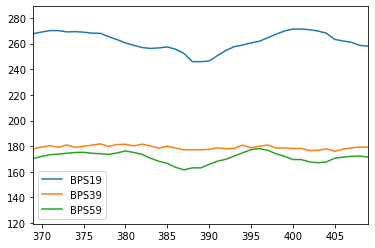

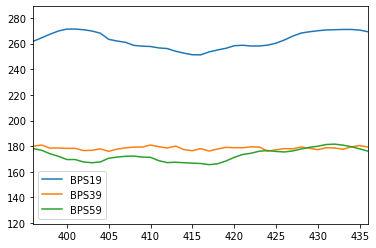

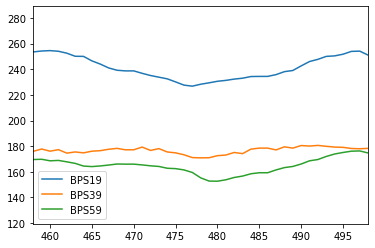

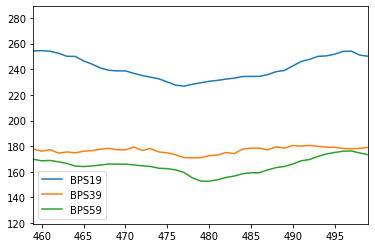

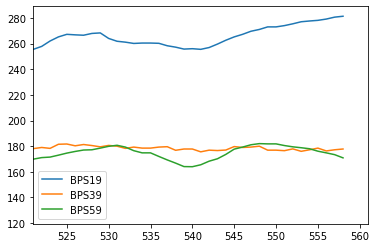

In [87]:
tno=19
for i in c_result[tno-1]:
    df[triads[tno-1]].plot(xlim=[i-20,i+20])

In [51]:
df = pd.read_csv('LFC Bad data/LFC_Bad_2.csv')


c_result=[]
funnel = []
for curr in triads[0:20]:
    
    input1 = df[curr[0]].to_numpy()
    input2 = df[curr[1]].to_numpy()
    input3 = df[curr[2]].to_numpy()
    
    num=len(input1)
    
    sens=2.7
    band=4
    
    t1= (sens/100)*np.mean(input1)
    t2= (sens/100)*np.mean(input2)
    t3= (sens/100)*np.mean(input3)
    
    signal1 =  (np.roll(input1,band) - input1 > t1) & (np.roll(input1,-band) - input1 > t1)
    signal2 = (np.roll(input2,band) - input2 > t2) & (np.roll(input2,-band) - input2 > t2)
    signal3 = (np.roll(input3,band) - input3 > t3) & (np.roll(input3,-band) - input3 > t3)
    
    sig_1=[]
    sig_2=[]
    sig_3=[]

    for i in range(len(signal1)):
        if signal1[i] == True:
            sig_1.append(i)
        
    for i in range(len(signal2)):
        if signal2[i] == True:
            sig_2.append(i)

    for i in range(len(signal3)):
        if signal3[i] == True:
            sig_3.append(i)
            
    common=[]
    
    for i in sig_1:
        if ((i+1) in sig_2 or i in sig_2 or (i-1) in sig_2) and ((i+1) in sig_3 or i in sig_3 or (i-1) in sig_3):
            common.append(i)

    for i in common:
        if (i+1) in common:
            common.remove(i)
            
    c_result.append(common)
    funnel.append(len(common))
    
    print(curr[0] + ' + ' + curr[1] + ' + ' + curr[2] + ' = ' + str(common)+ '\n\n')

BPS1 + BPS21 + BPS41 = []


BPS2 + BPS22 + BPS42 = [146, 315]


BPS3 + BPS23 + BPS43 = []


BPS4 + BPS24 + BPS44 = []


BPS5 + BPS25 + BPS45 = []


BPS6 + BPS26 + BPS46 = []


BPS7 + BPS27 + BPS47 = [341, 342]


BPS8 + BPS28 + BPS48 = []


BPS9 + BPS29 + BPS49 = []


BPS10 + BPS30 + BPS50 = []


BPS11 + BPS31 + BPS51 = []


BPS12 + BPS32 + BPS52 = []


BPS13 + BPS33 + BPS53 = []


BPS14 + BPS34 + BPS54 = []


BPS15 + BPS35 + BPS55 = []


BPS16 + BPS36 + BPS56 = []


BPS17 + BPS37 + BPS57 = []


BPS18 + BPS38 + BPS58 = []


BPS19 + BPS39 + BPS59 = []


BPS20 + BPS40 + BPS60 = []




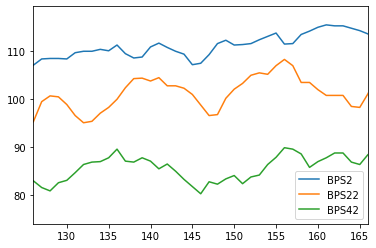

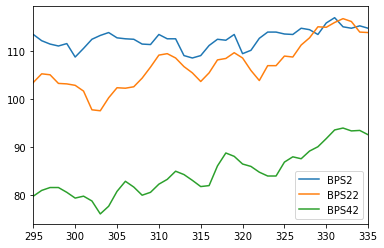

In [54]:
tno=2
for i in c_result[tno-1]:
    df[triads[tno-1]].plot(xlim=[i-20,i+20])

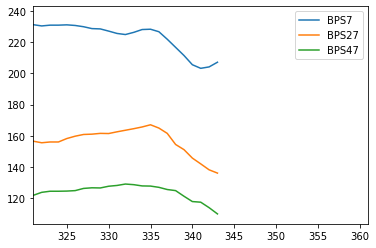

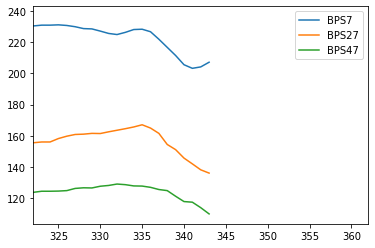

In [55]:
tno=7
for i in c_result[tno-1]:
    df[triads[tno-1]].plot(xlim=[i-20,i+20])

In [30]:
df = pd.read_csv('LFC Bad data/LFC_Bad_3.csv')


c_result=[]
funnel = []
for curr in triads[0:20]:
    
    input1 = df[curr[0]].to_numpy()
    input2 = df[curr[1]].to_numpy()
    input3 = df[curr[2]].to_numpy()
    
    num=len(input1)
    
    sens=2.7
    band=4
    
    t1= (sens/100)*np.mean(input1)
    t2= (sens/100)*np.mean(input2)
    t3= (sens/100)*np.mean(input3)
    
    signal1 =  (np.roll(input1,band) - input1 > t1) & (np.roll(input1,-band) - input1 > t1)
    signal2 = (np.roll(input2,band) - input2 > t2) & (np.roll(input2,-band) - input2 > t2)
    signal3 = (np.roll(input3,band) - input3 > t3) & (np.roll(input3,-band) - input3 > t3)
    
    sig_1=[]
    sig_2=[]
    sig_3=[]

    for i in range(len(signal1)):
        if signal1[i] == True:
            sig_1.append(i)
        
    for i in range(len(signal2)):
        if signal2[i] == True:
            sig_2.append(i)

    for i in range(len(signal3)):
        if signal3[i] == True:
            sig_3.append(i)
            
    common=[]
    
    for i in sig_1:
        if ((i+1) in sig_2 or i in sig_2 or (i-1) in sig_2) and ((i+1) in sig_3 or i in sig_3 or (i-1) in sig_3):
            common.append(i)

    for i in common:
        if (i+1) in common:
            common.remove(i)
            
    c_result.append(common)
    funnel.append(len(common))
    
    print(curr[0] + ' + ' + curr[1] + ' + ' + curr[2] + ' = ' + str(common)+ '\n\n')

BPS1 + BPS21 + BPS41 = [95, 354, 714]


BPS2 + BPS22 + BPS42 = [231]


BPS3 + BPS23 + BPS43 = []


BPS4 + BPS24 + BPS44 = []


BPS5 + BPS25 + BPS45 = []


BPS6 + BPS26 + BPS46 = []


BPS7 + BPS27 + BPS47 = []


BPS8 + BPS28 + BPS48 = []


BPS9 + BPS29 + BPS49 = [559]


BPS10 + BPS30 + BPS50 = []


BPS11 + BPS31 + BPS51 = [533]


BPS12 + BPS32 + BPS52 = [163, 164, 202, 256, 345, 363, 408, 434, 621]


BPS13 + BPS33 + BPS53 = []


BPS14 + BPS34 + BPS54 = []


BPS15 + BPS35 + BPS55 = []


BPS16 + BPS36 + BPS56 = []


BPS17 + BPS37 + BPS57 = []


BPS18 + BPS38 + BPS58 = []


BPS19 + BPS39 + BPS59 = []


BPS20 + BPS40 + BPS60 = []




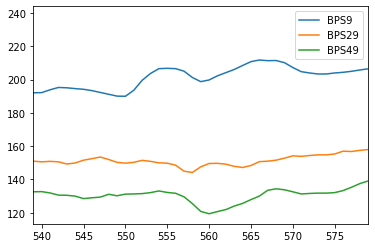

In [59]:
tno=9
for i in c_result[tno-1]:
    df[triads[tno-1]].plot(xlim=[i-20,i+20])

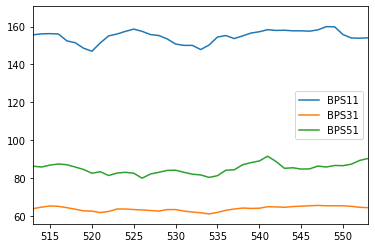

In [60]:
tno=11
for i in c_result[tno-1]:
    df[triads[tno-1]].plot(xlim=[i-20,i+20])

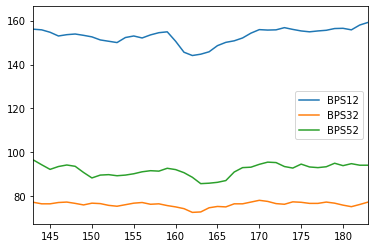

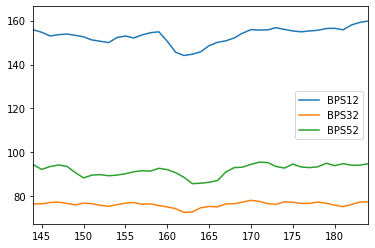

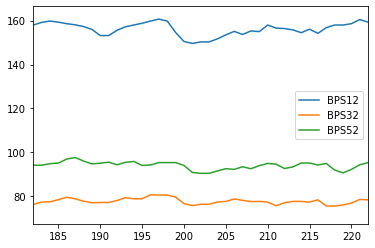

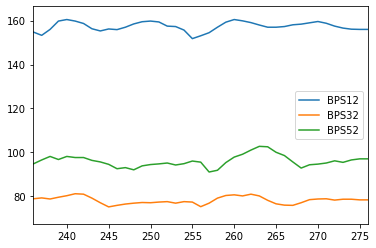

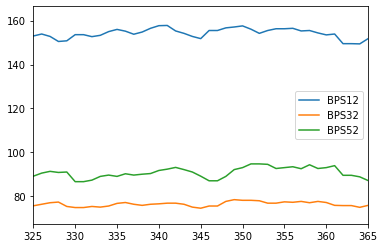

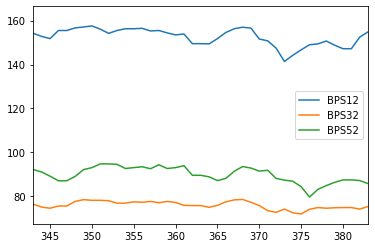

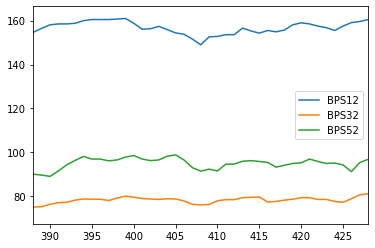

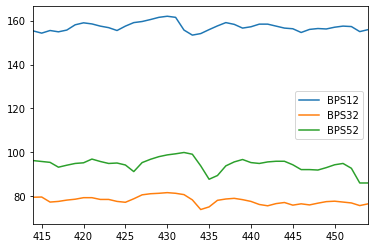

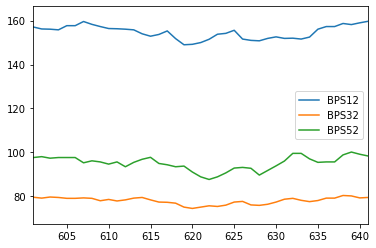

In [61]:
tno=12
for i in c_result[tno-1]:
    df[triads[tno-1]].plot(xlim=[i-20,i+20])

In [67]:
df = pd.read_csv('LFC Bad data/LFC_Bad_4.csv')


c_result=[]
funnel = []
for curr in triads[0:20]:
    
    input1 = df[curr[0]].to_numpy()
    input2 = df[curr[1]].to_numpy()
    input3 = df[curr[2]].to_numpy()
    
    num=len(input1)
    
    sens=1.5
    band=4
    
    t1= (sens/100)*np.mean(input1)
    t2= (sens/100)*np.mean(input2)
    t3= (sens/100)*np.mean(input3)
    
    signal1 =  (np.roll(input1,band) - input1 > t1) & (np.roll(input1,-band) - input1 > t1)
    signal2 = (np.roll(input2,band) - input2 > t2) & (np.roll(input2,-band) - input2 > t2)
    signal3 = (np.roll(input3,band) - input3 > t3) & (np.roll(input3,-band) - input3 > t3)
    
    sig_1=[]
    sig_2=[]
    sig_3=[]

    for i in range(len(signal1)):
        if signal1[i] == True:
            sig_1.append(i)
        
    for i in range(len(signal2)):
        if signal2[i] == True:
            sig_2.append(i)

    for i in range(len(signal3)):
        if signal3[i] == True:
            sig_3.append(i)
            
    common=[]
    
    for i in sig_1:
        if ((i+1) in sig_2 or i in sig_2 or (i-1) in sig_2) and ((i+1) in sig_3 or i in sig_3 or (i-1) in sig_3):
            common.append(i)

    for i in common:
        if (i+1) in common:
            common.remove(i)
            
    c_result.append(common)
    funnel.append(len(common))
    
    print(curr[0] + ' + ' + curr[1] + ' + ' + curr[2] + ' = ' + str(common)+ '\n\n')

BPS1 + BPS21 + BPS41 = [66, 111, 113, 233, 305, 548, 661, 814, 880, 988]


BPS2 + BPS22 + BPS42 = [261, 880, 924]


BPS3 + BPS23 + BPS43 = []


BPS4 + BPS24 + BPS44 = []


BPS5 + BPS25 + BPS45 = []


BPS6 + BPS26 + BPS46 = []


BPS7 + BPS27 + BPS47 = [812]


BPS8 + BPS28 + BPS48 = []


BPS9 + BPS29 + BPS49 = []


BPS10 + BPS30 + BPS50 = []


BPS11 + BPS31 + BPS51 = []


BPS12 + BPS32 + BPS52 = [55, 410]


BPS13 + BPS33 + BPS53 = []


BPS14 + BPS34 + BPS54 = []


BPS15 + BPS35 + BPS55 = []


BPS16 + BPS36 + BPS56 = []


BPS17 + BPS37 + BPS57 = []


BPS18 + BPS38 + BPS58 = []


BPS19 + BPS39 + BPS59 = []


BPS20 + BPS40 + BPS60 = []




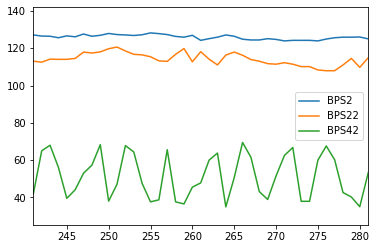

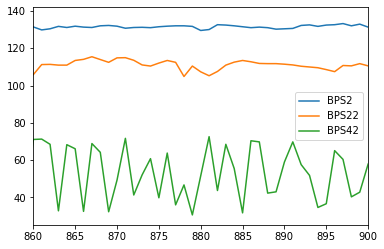

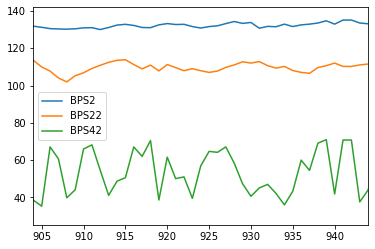

In [71]:
tno=2
for i in c_result[tno-1]:
    df[triads[tno-1]].plot(xlim=[i-20,i+20])

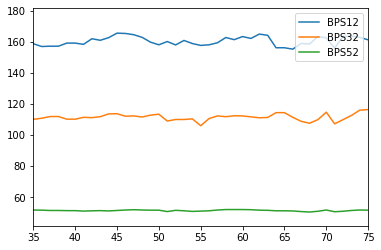

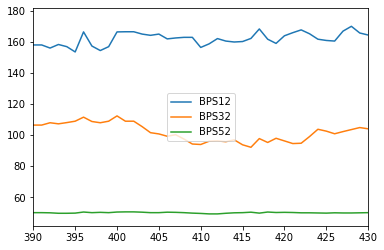

In [72]:
#no...405
tno=12
for i in c_result[tno-1]:
    df[triads[tno-1]].plot(xlim=[i-20,i+20])

####
BPS11 + BPS31 + BPS51 = [406, 407]

# old approach with new data

In [100]:
# Data
df = pd.read_csv('LFC Bad data/LFC_Bad_1.csv')
c_result= []
funnel = []

lag = 10
threshold = 3
influence = 0.1

for curr in triads[0:20]:
    
    y1 = df[curr[0]].to_numpy()
    y2 = df[curr[1]].to_numpy()
    y3 = df[curr[2]].to_numpy()
    
    num=len(y1)

    
    # Run algo with settings from above
    result1 = thresholding_algo(y1, lag=lag, threshold=threshold, influence=influence)
    result2 = thresholding_algo(y2, lag=lag, threshold=threshold, influence=influence)
    result3 = thresholding_algo(y3, lag=lag, threshold=threshold, influence=influence)

    locations1=[]
    for i in range(len(result1['signals'])):
        if result1['signals'][i] == -1.0:
            locations1.append(i)

    locations2=[]
    for i in range(len(result2['signals'])):
        if result2['signals'][i] == -1.0:
            locations2.append(i)

    locations3=[]
    for i in range(len(result3['signals'])):
        if result3['signals'][i] == -1.0:
            locations3.append(i)

    s1 = set(locations1)
    s2 = set(locations2)
    s3 = set(locations3)
    set1 = s1.intersection(s2)
    result_set = set1.intersection(s3)
    result_set= list(result_set)
    result_set.sort()
    funnel.append(len(result_set))
    c_result.append(result_set)
    print(curr[0] + ' + ' + curr[1] + ' + ' + curr[2] + ' = ' + str(result_set)+ '\n\n')

BPS1 + BPS21 + BPS41 = [33, 399, 400]


BPS2 + BPS22 + BPS42 = [231]


BPS3 + BPS23 + BPS43 = [279]


BPS4 + BPS24 + BPS44 = [387]


BPS5 + BPS25 + BPS45 = []


BPS6 + BPS26 + BPS46 = []


BPS7 + BPS27 + BPS47 = [99, 100]


BPS8 + BPS28 + BPS48 = [507, 509, 511, 513]


BPS9 + BPS29 + BPS49 = []


BPS10 + BPS30 + BPS50 = [60]


BPS11 + BPS31 + BPS51 = [237, 238, 405, 406, 407]


BPS12 + BPS32 + BPS52 = [286, 287, 288, 397]


BPS13 + BPS33 + BPS53 = []


BPS14 + BPS34 + BPS54 = []


BPS15 + BPS35 + BPS55 = [245, 246, 247, 249, 284, 285, 286]


BPS16 + BPS36 + BPS56 = [296, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 459, 461, 506, 508]


BPS17 + BPS37 + BPS57 = []


BPS18 + BPS38 + BPS58 = [455]


BPS19 + BPS39 + BPS59 = [476, 477, 478, 479]


BPS20 + BPS40 + BPS60 = []




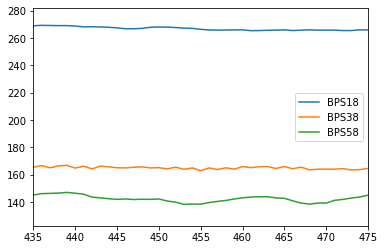

In [115]:
tno=18
for i in c_result[tno-1]:
    df[triads[tno-1]].plot(xlim=[i-20,i+20])

In [ ]:
# list 4 
405 in triad 11
478 in triad 19

In [116]:
# Data
df = pd.read_csv('LFC Bad data/LFC_Bad_2.csv')
c_result= []
funnel = []

lag = 10
threshold = 3
influence = 0.1

for curr in triads[0:20]:
    
    y1 = df[curr[0]].to_numpy()
    y2 = df[curr[1]].to_numpy()
    y3 = df[curr[2]].to_numpy()
    
    num=len(y1)

    
    # Run algo with settings from above
    result1 = thresholding_algo(y1, lag=lag, threshold=threshold, influence=influence)
    result2 = thresholding_algo(y2, lag=lag, threshold=threshold, influence=influence)
    result3 = thresholding_algo(y3, lag=lag, threshold=threshold, influence=influence)

    locations1=[]
    for i in range(len(result1['signals'])):
        if result1['signals'][i] == -1.0:
            locations1.append(i)

    locations2=[]
    for i in range(len(result2['signals'])):
        if result2['signals'][i] == -1.0:
            locations2.append(i)

    locations3=[]
    for i in range(len(result3['signals'])):
        if result3['signals'][i] == -1.0:
            locations3.append(i)

    s1 = set(locations1)
    s2 = set(locations2)
    s3 = set(locations3)
    set1 = s1.intersection(s2)
    result_set = set1.intersection(s3)
    result_set= list(result_set)
    result_set.sort()
    funnel.append(len(result_set))
    c_result.append(result_set)
    print(curr[0] + ' + ' + curr[1] + ' + ' + curr[2] + ' = ' + str(result_set)+ '\n\n')

BPS1 + BPS21 + BPS41 = []


BPS2 + BPS22 + BPS42 = [121, 122, 123, 124, 125, 126, 343]


BPS3 + BPS23 + BPS43 = [125, 126]


BPS4 + BPS24 + BPS44 = []


BPS5 + BPS25 + BPS45 = []


BPS6 + BPS26 + BPS46 = [107, 108, 109, 205]


BPS7 + BPS27 + BPS47 = [339, 340, 341, 342, 343]


BPS8 + BPS28 + BPS48 = []


BPS9 + BPS29 + BPS49 = []


BPS10 + BPS30 + BPS50 = []


BPS11 + BPS31 + BPS51 = [94, 164]


BPS12 + BPS32 + BPS52 = []


BPS13 + BPS33 + BPS53 = [200, 343]


BPS14 + BPS34 + BPS54 = [138, 139, 140]


BPS15 + BPS35 + BPS55 = []


BPS16 + BPS36 + BPS56 = []


BPS17 + BPS37 + BPS57 = []


BPS18 + BPS38 + BPS58 = []


BPS19 + BPS39 + BPS59 = [314, 315, 316, 317, 318]


BPS20 + BPS40 + BPS60 = [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 87]




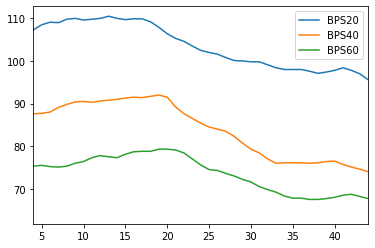

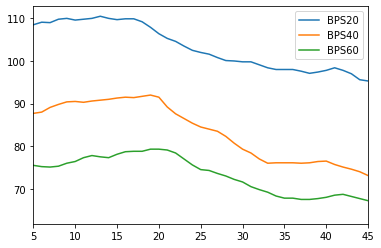

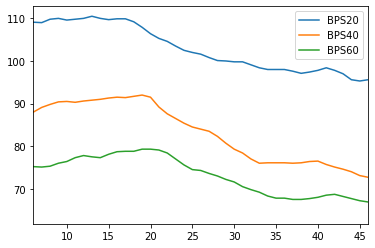

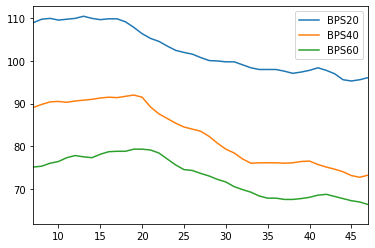

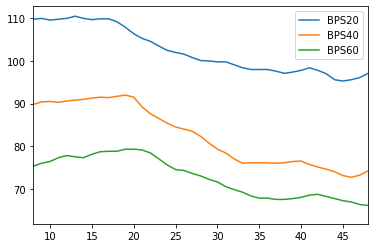

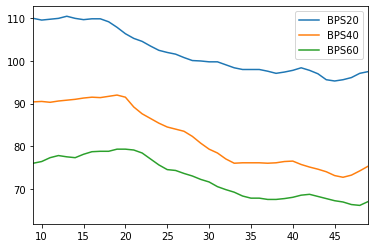

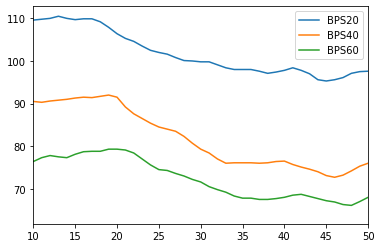

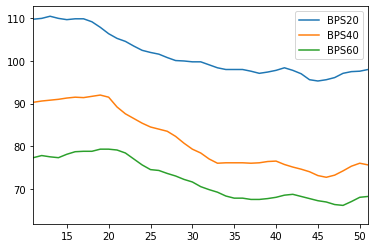

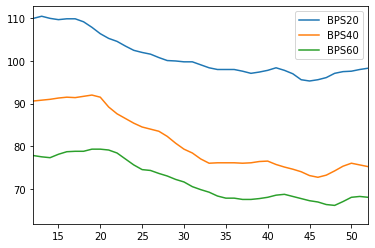

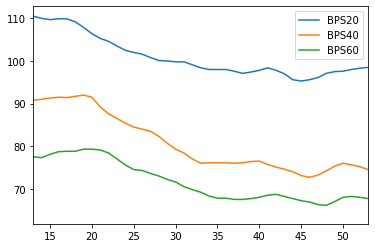

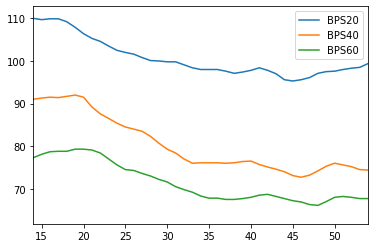

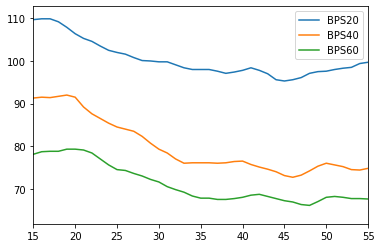

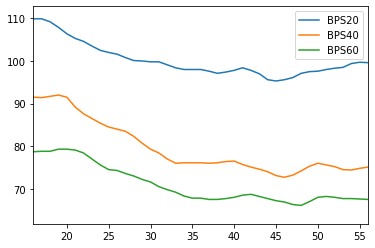

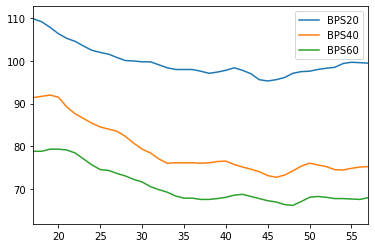

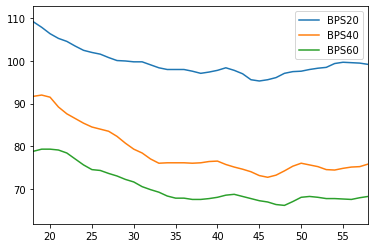

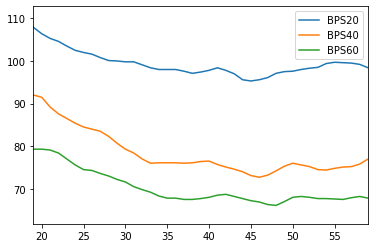

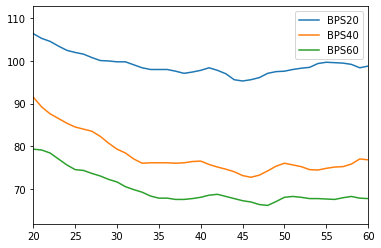

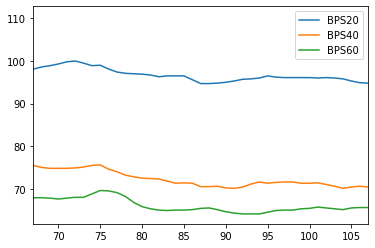

In [124]:
tno=20
for i in c_result[tno-1]:
    df[triads[tno-1]].plot(xlim=[i-20,i+20])

In [ ]:
#probs 123, 342 in triad 2
145 in triad 2
#probs 345 in triad 7
#probs 35-45 in triad 20

In [125]:
# Data
df = pd.read_csv('LFC Bad data/LFC_Bad_3.csv')
c_result= []
funnel = []

lag = 10
threshold = 3
influence = 0.1

for curr in triads[0:20]:
    
    y1 = df[curr[0]].to_numpy()
    y2 = df[curr[1]].to_numpy()
    y3 = df[curr[2]].to_numpy()
    
    num=len(y1)

    
    # Run algo with settings from above
    result1 = thresholding_algo(y1, lag=lag, threshold=threshold, influence=influence)
    result2 = thresholding_algo(y2, lag=lag, threshold=threshold, influence=influence)
    result3 = thresholding_algo(y3, lag=lag, threshold=threshold, influence=influence)

    locations1=[]
    for i in range(len(result1['signals'])):
        if result1['signals'][i] == -1.0:
            locations1.append(i)

    locations2=[]
    for i in range(len(result2['signals'])):
        if result2['signals'][i] == -1.0:
            locations2.append(i)

    locations3=[]
    for i in range(len(result3['signals'])):
        if result3['signals'][i] == -1.0:
            locations3.append(i)

    s1 = set(locations1)
    s2 = set(locations2)
    s3 = set(locations3)
    set1 = s1.intersection(s2)
    result_set = set1.intersection(s3)
    result_set= list(result_set)
    result_set.sort()
    funnel.append(len(result_set))
    c_result.append(result_set)
    print(curr[0] + ' + ' + curr[1] + ' + ' + curr[2] + ' = ' + str(result_set)+ '\n\n')

BPS1 + BPS21 + BPS41 = [94, 95, 270, 445, 446, 447, 490, 540, 711, 712]


BPS2 + BPS22 + BPS42 = [46, 47, 230, 231, 447, 541, 713]


BPS3 + BPS23 + BPS43 = []


BPS4 + BPS24 + BPS44 = [382, 567, 568]


BPS5 + BPS25 + BPS45 = [480]


BPS6 + BPS26 + BPS46 = [95]


BPS7 + BPS27 + BPS47 = [312, 313]


BPS8 + BPS28 + BPS48 = [885]


BPS9 + BPS29 + BPS49 = []


BPS10 + BPS30 + BPS50 = []


BPS11 + BPS31 + BPS51 = []


BPS12 + BPS32 + BPS52 = [40, 41, 42, 51, 73, 74, 163, 362, 363, 364, 373, 407, 408, 409]


BPS13 + BPS33 + BPS53 = []


BPS14 + BPS34 + BPS54 = [34, 35, 36, 37, 38]


BPS15 + BPS35 + BPS55 = [64, 378, 379, 753, 754, 755]


BPS16 + BPS36 + BPS56 = [789]


BPS17 + BPS37 + BPS57 = [514, 515, 516]


BPS18 + BPS38 + BPS58 = [102, 712, 713, 718, 726, 727, 728, 729, 730, 731]


BPS19 + BPS39 + BPS59 = []


BPS20 + BPS40 + BPS60 = []




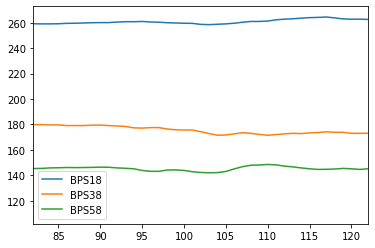

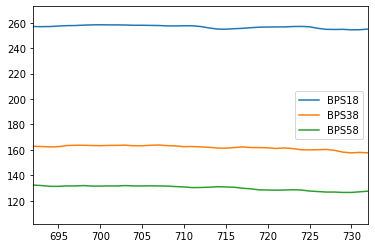

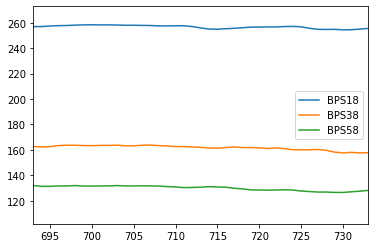

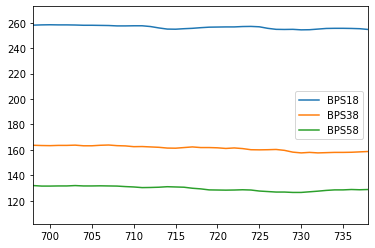

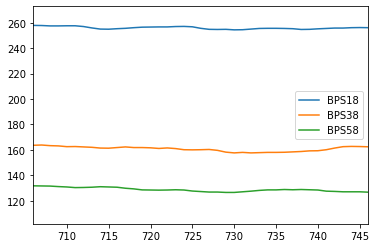

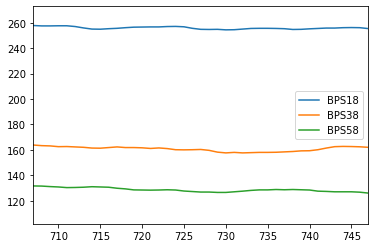

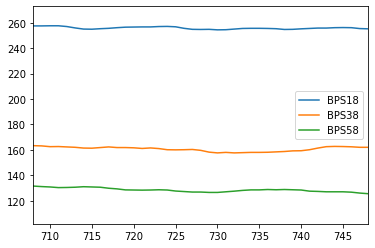

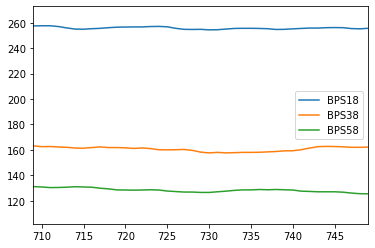

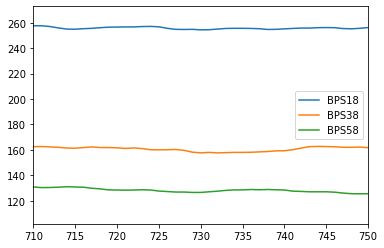

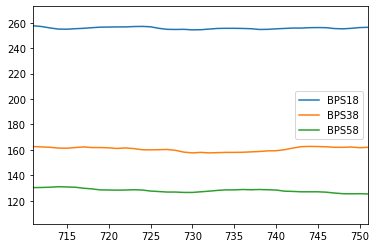

In [130]:
tno=18
for i in c_result[tno-1]:
    df[triads[tno-1]].plot(xlim=[i-20,i+20])

In [ ]:
#95,335,  445, 712 in triad1
#70-75 in, 407, 435 triad 12
